In [1]:
# Importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration

#### Dataset

In [2]:
# Set the directory paths for the dataset
train_dir = "chest_xray/train/"
test_dir = "chest_xray/test/"
val_dir = "chest_xray/val/"

In [3]:
# Explore distribution of the data
def explore_data(directory):
    categories = ["Normal", "Pneumonia"]
    for category in categories:
        path = os.path.join(directory, category)
        print(f"{category}: {len(os.listdir(path))} images")


explore_data(train_dir)

Normal: 1341 images
Pneumonia: 3875 images


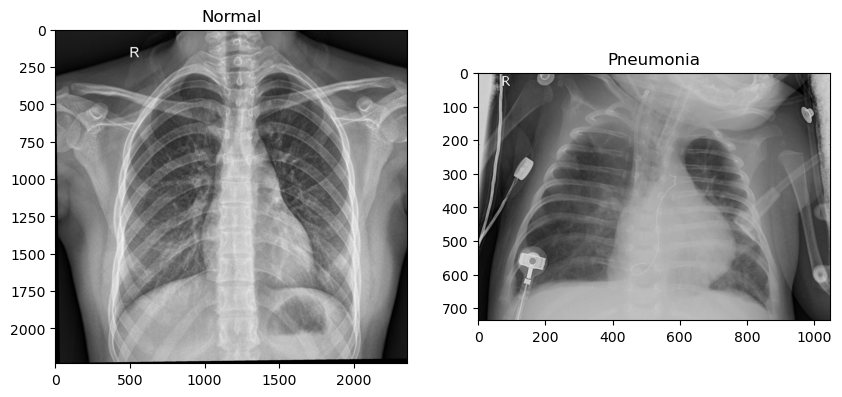

In [4]:
# Visualize sample images
def plot_sample_images(directory):
    categories = ["Normal", "Pneumonia"]
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    for i, category in enumerate(categories):
        path = os.path.join(directory, category)
        image_path = os.listdir(path)[0]
        img = plt.imread(os.path.join(path, image_path))
        axes[i].imshow(img, cmap='grey')
        axes[i].set_title(category)
    plt.show()

plot_sample_images(train_dir)

## 2. Preprocessing

In [5]:
# ImageDataGenerator for Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [6]:
# Flow images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator  = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## 3. Model Development

### 3.1 Model Development with VGG16 Architecture

In [7]:
# Create a sequential model
model_vgg16 = Sequential()

In [8]:
# 1st Convolutional Block
# 1st Convolutional Layer
model_vgg16.add(Conv2D(filters=64, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 2nd Convolutional Layer
model_vgg16.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Block
# 3rd Convolutional Layer
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 4th Convolutional Layer
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd Convolutional Block
# 5th Convolutional Layer
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 6th Convolutional Layer
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 7th Convolutional Layer
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 4th Convolutional Block
# 8th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 9th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 10th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 5th Convolutional Block
# 11th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 12th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# 13th Convolutional Layer
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_vgg16.add(BatchNormalization())
# Max Pooling
model_vgg16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Fully Connected Layers
# Flatten
model_vgg16.add(Flatten())
# FC1
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(BatchNormalization())
# Adding DropOut to prevent Overfitting
model_vgg16.add(Dropout(0.5))
#FC2
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(BatchNormalization())
# Adding DropOut to prevent Overfitting
model_vgg16.add(Dropout(0.5))
# Output Layer
model_vgg16.add(Dense(1, activation='sigmoid'))

2024-08-19 10:22:31.996441: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-08-19 10:22:31.996477: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-08-19 10:22:31.996485: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-08-19 10:22:31.996704: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-19 10:22:31.996722: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# Display a summary of the model vgg16 architecture, including the number of parameters in each layer
model_vgg16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 512)    │         2,04

 Total params: 134,314,305 (512.37 MB)

 Trainable params: 134,289,473 (512.27 MB)

 Non-trainable params: 24,832 (97.00 KB)

In [10]:
# Compile the Model
from tensorflow.keras.optimizers import Adam
model_vgg16.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training VGG16 Architecture

In [11]:
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch = 80,
    validation_data=val_generator,
    epochs=25
)

Epoch 1/25


2024-08-19 10:24:42.968379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7054 - loss: 1.9770 - val_accuracy: 0.5000 - val_loss: 99.4665
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8728 - loss: 0.3601 - val_accuracy: 0.4375 - val_loss: 2.1899
Epoch 3/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:53 1s/step - accuracy: 0.9010 - loss: 0.2464

2024-08-19 10:28:48.900981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-19 10:28:48.901021: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 616273883017157374
2024-08-19 10:28:48.901025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_68/_238]]
2024-08-19 10:28:48.901044: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12964409045189212496
2024-08-19 10:28:48.901047: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11487714562551279585
2024-08-19 10:28:48.901051: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17993744

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9061 - loss: 0.2674 - val_accuracy: 0.2500 - val_loss: 1.9524
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8864 - loss: 0.2810 - val_accuracy: 0.4375 - val_loss: 1.2571
Epoch 5/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9128 - loss: 0.2658 - val_accuracy: 0.5000 - val_loss: 11.4023
Epoch 6/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:52 1s/step - accuracy: 0.8941 - loss: 0.3208

2024-08-19 10:32:50.519035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-19 10:32:50.519053: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8505095420157071532
2024-08-19 10:32:50.519115: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12964409045189212496
2024-08-19 10:32:50.519132: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 18332662706827946704
2024-08-19 10:32:50.519138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_26/_192]]
2024-08-19 10:32:50.519151: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7397335

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8857 - loss: 0.3298 - val_accuracy: 0.5000 - val_loss: 9.9571
Epoch 7/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9164 - loss: 0.2202 - val_accuracy: 0.5000 - val_loss: 9.5977
Epoch 8/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9303 - loss: 0.1727 - val_accuracy: 0.5625 - val_loss: 4.7431
Epoch 9/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:52 1s/step - accuracy: 0.9514 - loss: 0.2281

2024-08-19 10:36:53.541169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-19 10:36:53.541216: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8505095420157071532
2024-08-19 10:36:53.541221: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7371944937506692154
2024-08-19 10:36:53.541227: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057393574277797648
2024-08-19 10:36:53.541234: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12964409045189212496
2024-08-19 10:36:53.541239: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7397335962340403858
2024-08-19 10:36:53.541244: I tensorflow/core/framework/local_rendezv

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9480 - loss: 0.2453 - val_accuracy: 0.5625 - val_loss: 4.1862
Epoch 10/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9092 - loss: 0.2369 - val_accuracy: 0.5000 - val_loss: 9.9891
Epoch 11/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9319 - loss: 0.1882 - val_accuracy: 0.5000 - val_loss: 2.8072
Epoch 12/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:52 1s/step - accuracy: 0.9427 - loss: 0.2382

2024-08-19 10:40:55.879255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-19 10:40:55.879271: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7181812952816639792
2024-08-19 10:40:55.879275: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9819383656679186646
2024-08-19 10:40:55.879281: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6984967558897934946
2024-08-19 10:40:55.879285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_26/_192]]
2024-08-19 10:40:55.879289: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 118067836

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9377 - loss: 0.2347 - val_accuracy: 0.5000 - val_loss: 2.8005
Epoch 13/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9226 - loss: 0.1960 - val_accuracy: 0.5000 - val_loss: 3.9385
Epoch 14/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9278 - loss: 0.1865 - val_accuracy: 0.5000 - val_loss: 1.1621
Epoch 15/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.9809 - loss: 0.0667

2024-08-19 10:44:57.963385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-19 10:44:57.963428: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8505095420157071532
2024-08-19 10:44:57.963433: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6984967558897934946
2024-08-19 10:44:57.963444: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7397335962340403858
2024-08-19 10:44:57.963448: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14718647746579184590
2024-08-19 10:44:57.963453: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7371944937506692154
2024-08-19 10:44:57.963457: I tensorflow/core/framework/local_rendezvo

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9592 - loss: 0.0917 - val_accuracy: 0.5625 - val_loss: 1.3638
Epoch 16/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9402 - loss: 0.1913 - val_accuracy: 0.5000 - val_loss: 1.9058
Epoch 17/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9267 - loss: 0.1745 - val_accuracy: 0.5000 - val_loss: 2.6401
Epoch 18/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:52 1s/step - accuracy: 0.9132 - loss: 0.2181

2024-08-19 10:49:00.452458: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-19 10:49:00.452485: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3195660933574157594
2024-08-19 10:49:00.452490: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8065202989564258134
2024-08-19 10:49:00.452495: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 18332662706827946704
2024-08-19 10:49:00.452501: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7397335962340403858
2024-08-19 10:49:00.452505: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14612929299921340984
2024-08-19 10:49:00.452509: I tensorflow/core/framework/local_rendezv

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8664 - loss: 0.3248 - val_accuracy: 0.5000 - val_loss: 2.7022
Epoch 19/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9387 - loss: 0.1727 - val_accuracy: 0.5000 - val_loss: 1.2205
Epoch 20/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9544 - loss: 0.1478 - val_accuracy: 0.5625 - val_loss: 1.9515
Epoch 21/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:55 1s/step - accuracy: 0.9531 - loss: 0.1742

2024-08-19 10:53:02.692551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-19 10:53:02.692567: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8505095420157071532
2024-08-19 10:53:02.692572: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14718647746579184590
2024-08-19 10:53:02.692576: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6984967558897934946
2024-08-19 10:53:02.692579: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4503509964664202408
2024-08-19 10:53:02.692583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Ad

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9381 - loss: 0.2006 - val_accuracy: 0.5000 - val_loss: 1.6660
Epoch 22/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9362 - loss: 0.1701 - val_accuracy: 0.5000 - val_loss: 1.6375
Epoch 23/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9370 - loss: 0.1621 - val_accuracy: 0.4375 - val_loss: 3.2426
Epoch 24/25
 3/80 ━━━━━━━━━━━━━━━━━━━━ 1:53 1s/step - accuracy: 0.9323 - loss: 0.2903

2024-08-19 10:57:06.355540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-19 10:57:06.355606: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8505095420157071532
2024-08-19 10:57:06.355612: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7181812952816639792
2024-08-19 10:57:06.355617: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8851130023863808828
2024-08-19 10:57:06.355622: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14612929299921340984
2024-08-19 10:57:06.355628: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057393574277797648
2024-08-19 10:57:06.355633: I tensorflow/core/framework/local_rendezv

80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9373 - loss: 0.2487 - val_accuracy: 0.5000 - val_loss: 3.0667
Epoch 25/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9445 - loss: 0.1559 - val_accuracy: 0.5000 - val_loss: 9.0085


In [12]:
history_vgg16.history

{'accuracy': [0.793749988079071,
  0.8812500238418579,
  0.90625,
  0.8832031488418579,
  0.91015625,
  0.8854166865348816,
  0.914843738079071,
  0.93359375,
  0.9479166865348816,
  0.917187511920929,
  0.9312499761581421,
  0.9375,
  0.92578125,
  0.9214843511581421,
  0.9583333134651184,
  0.93359375,
  0.9332031011581421,
  0.8645833134651184,
  0.9261718988418579,
  0.9574218988418579,
  0.9375,
  0.9332031011581421,
  0.938671886920929,
  0.9375,
  0.94140625],
 'loss': [0.9513916969299316,
  0.32822808623313904,
  0.2682490646839142,
  0.3108920156955719,
  0.2692916691303253,
  0.3301032483577728,
  0.22751495242118835,
  0.1756666600704193,
  0.24596484005451202,
  0.22401340305805206,
  0.1911541223526001,
  0.23451751470565796,
  0.1991003453731537,
  0.21211938560009003,
  0.09265759587287903,
  0.19649100303649902,
  0.17940492928028107,
  0.32898277044296265,
  0.203616663813591,
  0.13666968047618866,
  0.20166480541229248,
  0.18498003482818604,
  0.15590475499629974,
 

#### Performance Graph of VGG16

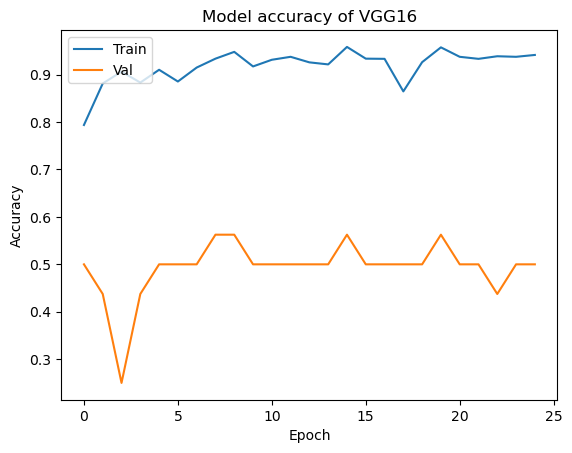

In [13]:
plt.plot(history_vgg16.history['accuracy'])  # Plot training accuracy
plt.plot(history_vgg16.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of VGG16')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Val'], loc='upper left')  
plt.show()

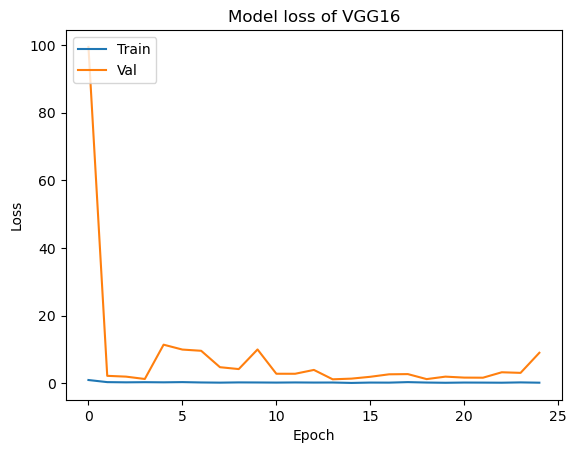

In [14]:
plt.plot(history_vgg16.history['loss'])  # Plot training loss
plt.plot(history_vgg16.history['val_loss'])  # Plot validation loss
plt.title('Model loss of VGG16')  
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show() 

#### Model Evaluation of VGG16

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model_vgg16.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - accuracy: 0.2984 - loss: 12.3536
Test Accuracy: 0.625
Test Loss: 6.655109882354736


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step


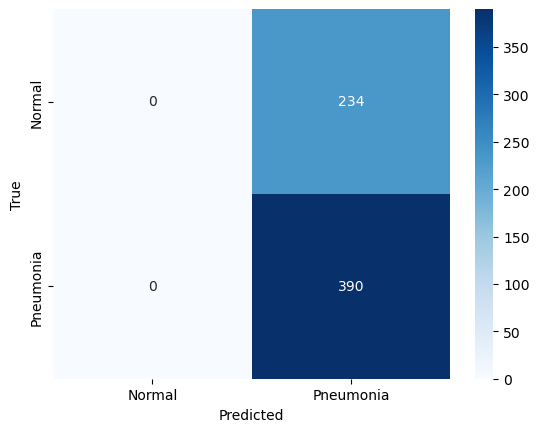

In [16]:
# Confusion Matrix
test_predictions = model_vgg16.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [17]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



### 3.2 Model Development with VGG19 Pre-Trained Architecture

In [18]:
from tensorflow.keras.applications import VGG19

In [19]:
# Load the VGG19 model
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [20]:
# Freeze the layers except the last block
for layer in vgg19_base.layers:
    layer.trainable = False

In [21]:
# Create a sequential model
model_vgg19 = Sequential()

In [22]:
# Add the VGG19 base model
model_vgg19.add(vgg19_base)
model_vgg19.add(Flatten())

# Fully connected layers
model_vgg19.add(Dense(4096, activation='relu'))
model_vgg19.add(BatchNormalization())
model_vgg19.add(Dropout(0.5))
model_vgg19.add(Dense(4096, activation='relu'))
model_vgg19.add(BatchNormalization())
model_vgg19.add(Dropout(0.5))
# Output layer
model_vgg19.add(Dense(1, activation='sigmoid'))

In [24]:
# Display a summary of the model vgg19 architecture
model_vgg19.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,607,105 (532.56 MB)

 Trainable params: 119,566,337 (456.11 MB)

 Non-trainable params: 20,040,768 (76.45 MB)

In [25]:
# Compile the model
model_vgg19.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training VGG19 Model

In [26]:
# Train the model
history_vgg19 = model_vgg19.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 401ms/step - accuracy: 0.8465 - loss: 0.9095 - val_accuracy: 0.6250 - val_loss: 1.5667
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 399ms/step - accuracy: 0.9256 - loss: 0.2528 - val_accuracy: 0.7500 - val_loss: 1.0241
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 398ms/step - accuracy: 0.9363 - loss: 0.1939 - val_accuracy: 0.7500 - val_loss: 0.7198
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 399ms/step - accuracy: 0.9442 - loss: 0.1716 - val_accuracy: 0.5000 - val_loss: 4.9944
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 399ms/step - accuracy: 0.9463 - loss: 0.1732 - val_accuracy: 0.9375 - val_loss: 0.1700
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 398ms/step - accuracy: 0.9445 - loss: 0.1664 - val_accuracy: 0.6875 - val_loss: 0.6650
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 399ms/step - accuracy: 0.9463 - loss: 0.1764 - val_accuracy: 0.8125 - val_loss: 0.7488
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 399ms/step - accuracy: 0.9508 - loss: 0

In [27]:
history_vgg19.history

{'accuracy': [0.8981978297233582,
  0.9275306463241577,
  0.9396088719367981,
  0.9455521702766418,
  0.9445935487747192,
  0.9447852969169617,
  0.9499616622924805,
  0.9472776055335999,
  0.9589723944664001,
  0.9545629024505615,
  0.9566717743873596,
  0.9603143930435181,
  0.9593558311462402,
  0.9606978297233582,
  0.95820552110672,
  0.9616564512252808,
  0.9608895778656006,
  0.9624233245849609,
  0.9631901979446411,
  0.9664493799209595,
  0.9666411280632019,
  0.9666411280632019,
  0.9668328166007996,
  0.9679831266403198,
  0.9660659432411194],
 'loss': [0.4784468114376068,
  0.24238045513629913,
  0.1882309764623642,
  0.16537322103977203,
  0.17583832144737244,
  0.17329077422618866,
  0.1555255502462387,
  0.1601421982049942,
  0.134783536195755,
  0.1391342580318451,
  0.12835831940174103,
  0.11581484228372574,
  0.10971034318208694,
  0.11344131827354431,
  0.1198529526591301,
  0.12448686361312866,
  0.14168839156627655,
  0.10076254606246948,
  0.10429630428552628,
  

#### Performance Graph of VGG19

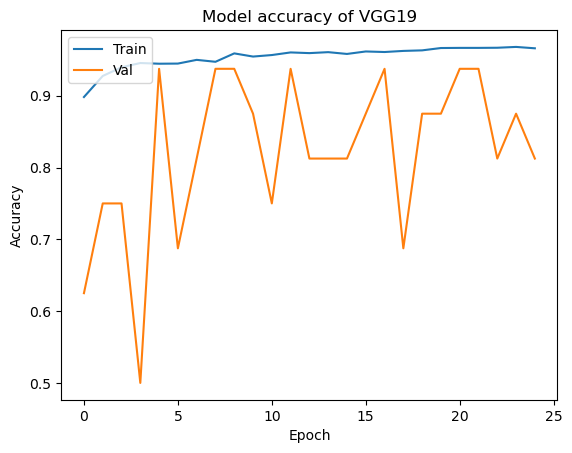

In [28]:
plt.plot(history_vgg19.history['accuracy'])  # Plot training accuracy
plt.plot(history_vgg19.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of VGG19')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Val'], loc='upper left')  
plt.show()

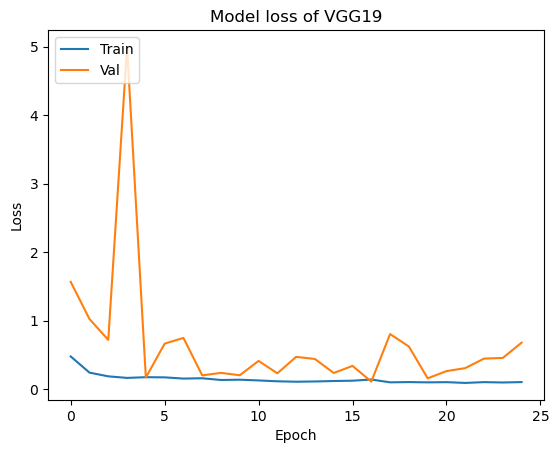

In [29]:
plt.plot(history_vgg19.history['loss'])  # Plot training loss
plt.plot(history_vgg19.history['val_loss'])  # Plot validation loss
plt.title('Model loss of VGG19')  
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

#### Model Evaluation of VGG19

In [30]:
# Evaluate the model on the test data
test_loss, test_acc = model_vgg19.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.8635 - loss: 0.7043
Test Accuracy: 0.9038461446762085
Test Loss: 0.46669450402259827


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step


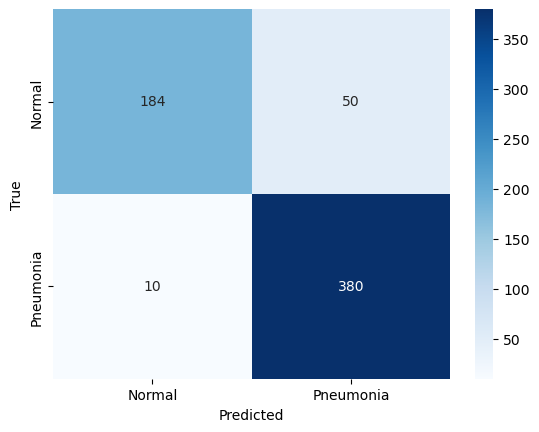

In [31]:
# Confusion Matrix
test_predictions = model_vgg19.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [32]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.95      0.79      0.86       234
   PNEUMONIA       0.88      0.97      0.93       390

    accuracy                           0.90       624
   macro avg       0.92      0.88      0.89       624
weighted avg       0.91      0.90      0.90       624



### 3.3 Model Development with ResNet50 Pre-Trained Architecture

In [33]:
from tensorflow.keras.applications import ResNet50

In [34]:
# Loading the ResNet50 model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [35]:
# Freeze the ResNet50 base model layers
for layer in resnet_base.layers:
    layer.trainable = False

In [36]:
# Create a sequential model
model_resnet50 = Sequential()

In [37]:
# Add the ResNet50 base
model_resnet50.add(resnet_base)
model_resnet50.add(Flatten())
model_resnet50.add(Dense(1024, activation='relu'))
model_resnet50.add(BatchNormalization())
model_resnet50.add(Dropout(0.5))  
model_resnet50.add(Dense(512, activation='relu'))  
model_resnet50.add(BatchNormalization())
model_resnet50.add(Dropout(0.5))  

# Output layer
model_resnet50.add(Dense(1, activation='sigmoid'))  

In [38]:
# Display a summary of the model resnet50 architecture
model_resnet50.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,880,641 (484.01 MB)

 Trainable params: 103,289,857 (394.02 MB)

 Non-trainable params: 23,590,784 (89.99 MB)

In [39]:
# Compile the model
model_resnet50.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training ResNet50 Model

In [40]:
# Train the model
history_resnet50 = model_resnet50.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 373ms/step - accuracy: 0.8071 - loss: 0.5235 - val_accuracy: 0.5000 - val_loss: 16.5286
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 349ms/step - accuracy: 0.8839 - loss: 0.3221 - val_accuracy: 0.5000 - val_loss: 3.5023
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 350ms/step - accuracy: 0.8985 - loss: 0.2831 - val_accuracy: 0.5000 - val_loss: 6.5073
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 350ms/step - accuracy: 0.9004 - loss: 0.2694 - val_accuracy: 0.5000 - val_loss: 8.5024
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 350ms/step - accuracy: 0.9070 - loss: 0.2340 - val_accuracy: 0.6250 - val_loss: 0.6363
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 350ms/step - accuracy: 0.9199 - loss: 0.2170 - val_accuracy: 0.5000 - val_loss: 4.3983
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 350ms/step - accuracy: 0.9107 - loss: 0.2232 - val_accuracy: 0.7500 - val_loss: 0.5092
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 350ms/step - accuracy: 0.9177 - loss: 

In [41]:
history_resnet50.history

{'accuracy': [0.8491181135177612,
  0.8874616622924805,
  0.8987730145454407,
  0.8993481397628784,
  0.9097009301185608,
  0.9156441688537598,
  0.9189033508300781,
  0.9213957190513611,
  0.9215874075889587,
  0.925230085849762,
  0.9298312664031982,
  0.9282975196838379,
  0.9281058311462402,
  0.932898759841919,
  0.928680956363678,
  0.9330905079841614,
  0.9294478297233582,
  0.9325153231620789,
  0.9382668733596802,
  0.939225435256958,
  0.9373083114624023,
  0.9363496899604797,
  0.9388419985771179,
  0.9371165633201599,
  0.9336656332015991],
 'loss': [0.4076887369155884,
  0.30255571007728577,
  0.26289328932762146,
  0.2589978277683258,
  0.22557412087917328,
  0.22134457528591156,
  0.20729652047157288,
  0.19993090629577637,
  0.19707365334033966,
  0.1858735829591751,
  0.1787670999765396,
  0.17610302567481995,
  0.18383298814296722,
  0.17219038307666779,
  0.17501574754714966,
  0.15842042863368988,
  0.17323243618011475,
  0.16867119073867798,
  0.15924981236457825,


#### Performance Graph of ResNet50

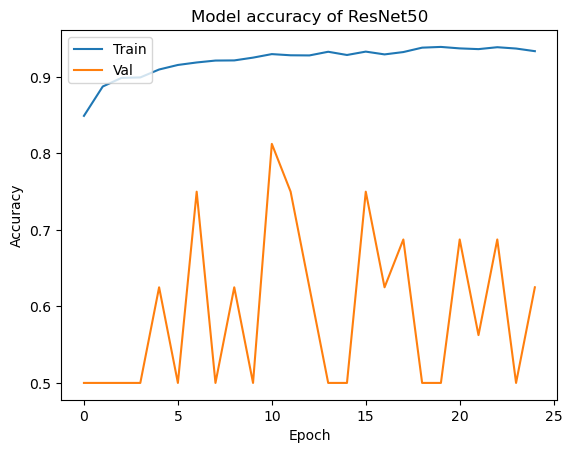

In [42]:
plt.plot(history_resnet50.history['accuracy'])  # Plot training accuracy
plt.plot(history_resnet50.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of ResNet50')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Val'], loc='upper left')  
plt.show()

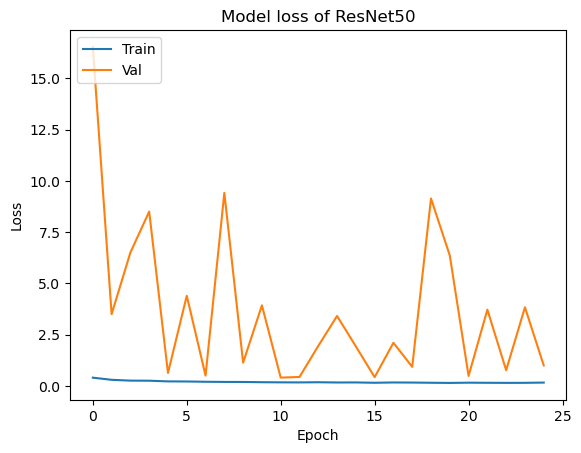

In [43]:
plt.plot(history_resnet50.history['loss'])  # Plot training loss
plt.plot(history_resnet50.history['val_loss'])  # Plot validation loss
plt.title('Model loss of ResNet50')  
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

#### Model Evaluation of ResNet50

In [44]:
# Evaluate the model on the test data
test_loss, test_acc = model_resnet50.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.8056 - loss: 0.6017
Test Accuracy: 0.870192289352417
Test Loss: 0.3891834318637848


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step


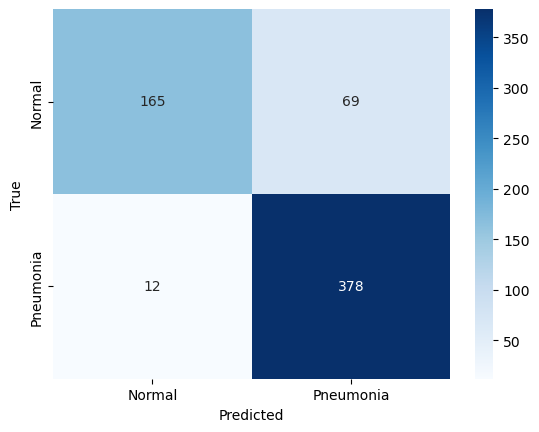

In [45]:
# Confusion Matrix
test_predictions = model_resnet50.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [46]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.93      0.71      0.80       234
   PNEUMONIA       0.85      0.97      0.90       390

    accuracy                           0.87       624
   macro avg       0.89      0.84      0.85       624
weighted avg       0.88      0.87      0.87       624



### 3.4 Model Development with InceptionV3 Pre-Trained Architecture

In [48]:
from tensorflow.keras.applications import InceptionV3

# Loading the InceptionV3 model
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [49]:
# Freeze the base layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

In [50]:
# Create a sequential model
model_inception = Sequential()

In [51]:
# Add the InceptionV3 base
model_inception.add(inception_base)

model_inception.add(Flatten())
model_inception.add(Dense(1024, activation='relu'))  
model_inception.add(BatchNormalization())
model_inception.add(Dropout(0.5)) 
model_inception.add(Dense(512, activation='relu'))  
model_inception.add(BatchNormalization())
model_inception.add(Dropout(0.5))  

# Output layer
model_inception.add(Dense(1, activation='sigmoid'))  

In [52]:
# Display a summary of the model InceptionV3 architecture
model_inception.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │    52,429,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,764,065 (285.20 MB)

 Trainable params: 52,958,209 (202.02 MB)

 Non-trainable params: 21,805,856 (83.18 MB)

In [53]:
# Compile the model
model_inception.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training InceptionV3 Model

In [54]:
# Train the model
history_inception = model_inception.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 370ms/step - accuracy: 0.8170 - loss: 0.4967 - val_accuracy: 0.6875 - val_loss: 0.9940
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 333ms/step - accuracy: 0.9120 - loss: 0.2509 - val_accuracy: 0.8750 - val_loss: 0.4996
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 335ms/step - accuracy: 0.9310 - loss: 0.1949 - val_accuracy: 0.8750 - val_loss: 0.5106
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 333ms/step - accuracy: 0.9368 - loss: 0.1753 - val_accuracy: 0.6875 - val_loss: 0.7666
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 334ms/step - accuracy: 0.9377 - loss: 0.1707 - val_accuracy: 0.8750 - val_loss: 0.3681
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 333ms/step - accuracy: 0.9456 - loss: 0.1457 - val_accuracy: 0.9375 - val_loss: 0.2612
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 330ms/step - accuracy: 0.9338 - loss: 0.1649 - val_accuracy: 0.8750 - val_loss: 0.4368
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 331ms/step - accuracy: 0.9556 - loss: 0

In [55]:
history_inception.history

{'accuracy': [0.8646472096443176,
  0.9183282256126404,
  0.9323236346244812,
  0.9340490698814392,
  0.9384585618972778,
  0.9438266754150391,
  0.9432515501976013,
  0.9509202241897583,
  0.9478527903556824,
  0.9516870975494385,
  0.949769914150238,
  0.9537960290908813,
  0.9543711543083191,
  0.9445935487747192,
  0.9559049010276794,
  0.9559049010276794,
  0.9612730145454407,
  0.9614647030830383,
  0.9606978297233582,
  0.9587806463241577,
  0.9610812664031982,
  0.95820552110672,
  0.9576303958892822,
  0.9566717743873596,
  0.9639570713043213],
 'loss': [0.3710443377494812,
  0.23174594342708588,
  0.18827307224273682,
  0.1755383312702179,
  0.16794998943805695,
  0.15079902112483978,
  0.1478024423122406,
  0.1285175234079361,
  0.137222021818161,
  0.12878504395484924,
  0.12700609862804413,
  0.12106829881668091,
  0.12095566838979721,
  0.13847415149211884,
  0.11431878060102463,
  0.12104186415672302,
  0.10641352087259293,
  0.11206761747598648,
  0.10449286550283432,
 

#### Performance Graph of InceptionV3

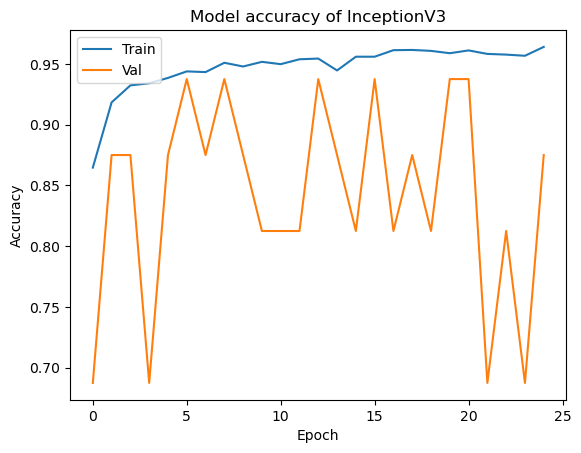

In [56]:
plt.plot(history_inception.history['accuracy'])  # Plot training accuracy
plt.plot(history_inception.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy of InceptionV3')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Val'], loc='upper left')  
plt.show()

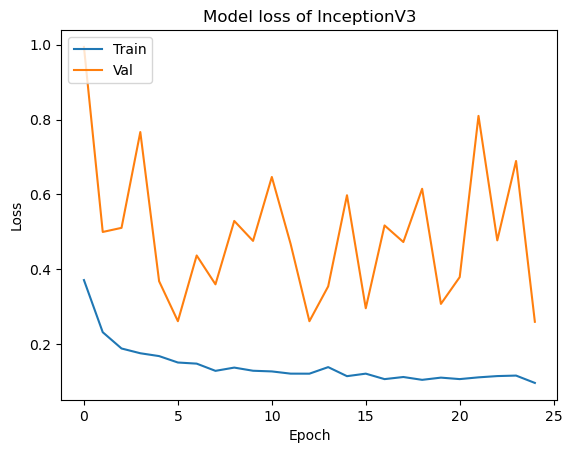

In [57]:
plt.plot(history_inception.history['loss'])  # Plot training loss
plt.plot(history_inception.history['val_loss'])  # Plot validation loss
plt.title('Model loss of InceptionV3')  
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

#### Model Evaluation of InceptionV3

In [58]:
# Evaluate the model on the test data
test_loss, test_acc = model_inception.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.8350 - loss: 0.4828
Test Accuracy: 0.8990384340286255
Test Loss: 0.3034992814064026


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 453ms/step


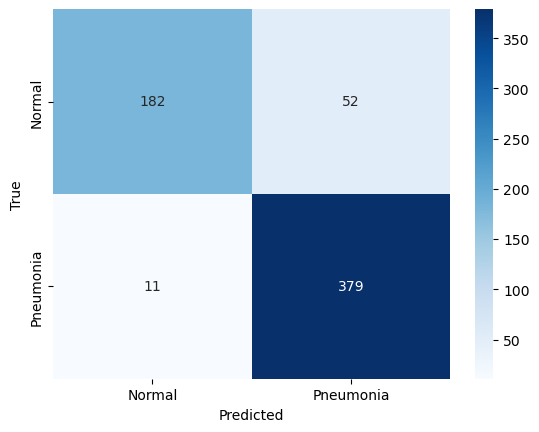

In [59]:
# Confusion Matrix
test_predictions = model_inception.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [60]:
# Classification Report
print(classification_report(test_generator.classes, test_predictions, target_names=['NORMAL', 'PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.94      0.78      0.85       234
   PNEUMONIA       0.88      0.97      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.87      0.89       624
weighted avg       0.90      0.90      0.90       624



## 4. Model Evaluation On Validation Data

In [61]:
# Evaluating all the model on the validation data to select the ideal model for testing.

vgg16_acc = model_vgg16.evaluate(val_generator)[1]
vgg19_acc = model_vgg19.evaluate(val_generator)[1]
resnet50_acc = model_resnet50.evaluate(val_generator)[1]
inceptionv3_acc = model_inception.evaluate(val_generator)[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.5000 - loss: 9.0085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.8125 - loss: 0.6800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.6250 - loss: 1.0038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.8750 - loss: 0.2596


In [62]:
print(f"VFF16 Validation Accuracy: {vgg16_acc:.4f}")
print(f"VGG19 Validation Accuracy: {vgg19_acc:.4f}")
print(f"ResNet50 Validation Accuracy: {resnet50_acc:.4f}")
print(f"InceptionV3 Validation Accuracy: {inceptionv3_acc:.4f}")

VFF16 Validation Accuracy: 0.5000
VGG19 Validation Accuracy: 0.8125
ResNet50 Validation Accuracy: 0.6250
InceptionV3 Validation Accuracy: 0.8750


**InceptionV3 shows the highest validation accuracy (0.8750), making it the most promising candidate for testing.**

## 5. Testing

In [63]:
# Load and preprocess the image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

#### Normal Image

In [64]:
image_path = r"/Users/bhushannimje/Documents/Company/Scifor Technologies/Major Project/Pneumonia Detection from Chest X-Rays Using Deep Learning/chest_xray/test/NORMAL/IM-0016-0001.jpeg" 
img = load_img(image_path, target_size=(224, 224))

In [65]:
# Convert to array and normalize pixel values
img = img_to_array(img)
img = img / 255.0  
img = np.expand_dims(img, axis=0)

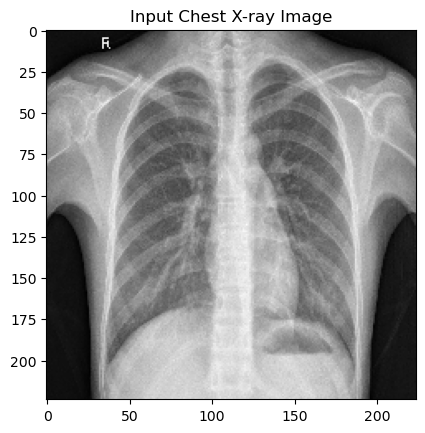

In [66]:
# Show the preprocessed image
plt.imshow(np.uint8(img[0] * 255))  # Convert back to [0, 255] range for display
plt.title('Input Chest X-ray Image')
plt.show()

In [67]:
# Make a prediction
rslt = model_inception.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [68]:
# Interpreting the result
# Assuming the model outputs 0 for NORMAL and 1 for PNEUMONIA
if rslt[0][0] > 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

# Print the prediction
print(f"Prediction: {prediction}")

# Probability score
print(f"Model Output (Probability): {rslt[0][0]}")

Prediction: NORMAL
Model Output (Probability): 0.09562698751688004


#### Pneumonia Image

In [69]:
image_path = r"/Users/bhushannimje/Documents/Company/Scifor Technologies/Major Project/Pneumonia Detection from Chest X-Rays Using Deep Learning/chest_xray/test/PNEUMONIA/person1_virus_9.jpeg"
img = load_img(image_path, target_size=(224, 224))

In [70]:
# Convert to array and normalize pixel values
img = img_to_array(img)
img = img / 255.0  
img = np.expand_dims(img, axis=0)

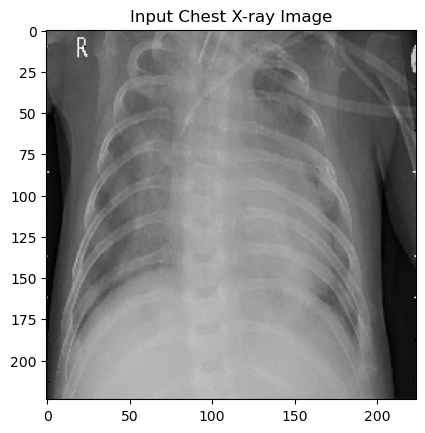

In [71]:
# Show the preprocessed image
plt.imshow(np.uint8(img[0] * 255))  # Convert back to [0, 255] range for display
plt.title('Input Chest X-ray Image')
plt.show()

In [72]:
# Make a prediction
rslt = model_inception.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


In [73]:
# Interpreting the result
# Assuming the model outputs 0 for NORMAL and 1 for PNEUMONIA
if rslt[0][0] > 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

# Print the prediction
print(f"Prediction: {prediction}")

# Probability score
print(f"Model Output (Probability): {rslt[0][0]}")

Prediction: PNEUMONIA
Model Output (Probability): 0.9999631643295288


## 6. Saving the Model

In [74]:
model_inception.save("Pneumonia Detection.keras")

In [75]:
# Load the model
model = keras.models.load_model("Pneumonia Detection.keras")

In [76]:
image_path = r"/Users/bhushannimje/Documents/Company/Scifor Technologies/Major Project/Pneumonia Detection from Chest X-Rays Using Deep Learning/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg"
img = load_img(image_path, target_size=(224, 224))

In [77]:
# Convert to array and normalize pixel values
img = img_to_array(img)
img = img / 255.0  
img = np.expand_dims(img, axis=0)

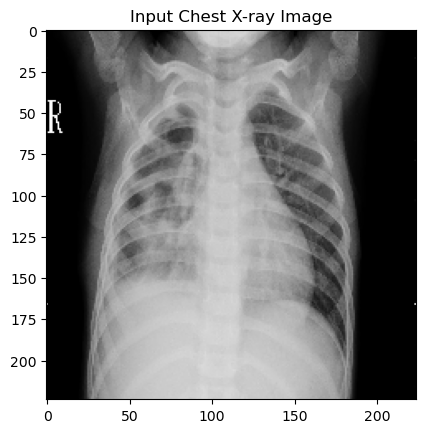

In [78]:
# Show the preprocessed image
plt.imshow(np.uint8(img[0] * 255))  # Convert back to [0, 255] range for display
plt.title('Input Chest X-ray Image')
plt.show()

In [79]:
# Make a prediction
rslt = model_inception.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [80]:
# Interpreting the result
# Assuming the model outputs 0 for NORMAL and 1 for PNEUMONIA
if rslt[0][0] > 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

# Print the prediction
print(f"Prediction: {prediction}")

# Probability score
print(f"Model Output (Probability): {rslt[0][0]}")

Prediction: PNEUMONIA
Model Output (Probability): 0.9221228957176208
